<a href="https://colab.research.google.com/github/aguusandy/ic_2023/blob/master/inteligencia_guia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guia Practica 2 IC 2023

## Ejercicio 1
Implemente el algoritmo de retropropagacion para un perceptron multicapa de forma que se pueda elegir libremente la cantidad de capas de la red y de neuronas en cada capa. Pruebelo entrenando una red de estructura apropiada para resolver el problema XOR, con sus particiones de entrenamiento y prueba correspondientes (datos de la Guıa de Trabajos Practicos 1).

In [ ]:
# cargamos los datos de entrenamiento
import numpy as np
datos_entrenamiento = np.genfromtxt("XOR_trn.csv", delimiter="," , skip_header=1)
datos_entrenamiento = datos_entrenamiento[0:99]
datos_ej1 = []
for i in np.arange(0,len(datos_entrenamiento)):
 datos_ej1.append( np.insert(datos_entrenamiento[i],0,-1) )
#datos = np.insert(datos_entrenamiento,0,-1,axis=1)
print(datos_ej1)

In [ ]:
# definimos el tamaño de la red y la cantidad de neuronas en cada capa
red_size = [2,1]

In [ ]:
# defino la matriz de pesos
pesos_ej1 = []
pesos_ej1.append(np.random.rand(red_size[0],len(datos_entrenamiento[0]-1))-0.5)
for i in np.arange(1,len(red_size)):
  pesos_ej1.append(np.random.rand(red_size[i],red_size[i-1]+1)-0.5)
print(pesos_ej1)


[array([[-0.23437815,  0.13771181,  0.35916974],
       [ 0.44304651, -0.16734286,  0.3772929 ]]), array([[-0.31792132,  0.01676342, -0.28629733]])]


In [ ]:
def sigmoid(x,a):
  return (2 / (1 + np.exp(-x*a))) - 1

In [ ]:
def neurona(entradas_v,pesos_v,a):
  v = np.dot(entradas_v,pesos_v)
  return sigmoid(v,a)

In [ ]:
def propagacion_adelante(entradas,pesos,red_size,a):
  y_v = [entradas]   # entradas = [-1,w1,w2] , y_v =[[-1,w1,w2]]
  for i in np.arange(0,len(red_size)):  # recorro las capas de la red
    pesos_capa = pesos[i]
    #print('capa ',i+1)
    #print('pesos :',pesos_capa)
    y = []
    for j in np.arange(0,red_size[i]):  # recorro cada neurona de la capa
      #print('neurona ',j+1)
      entrada_aux = y_v[i]
      if (i > 0):  # opcion: if(i!=0)
        entrada_aux = np.insert(entrada_aux,0,-1)
      #print('entrada: ', entrada_aux)
      y.append( neurona(entrada_aux,pesos_capa[j],a) )
      #print('salida: ',y[len(y)-1])
    y_v.append(y)
    #print(y_v)
  return y_v[1:len(y_v)]

In [ ]:
def calculo_error(yd,y):
  suma = 0
  for i in np.arange(0,len(y)):
    suma+= (yd[i] - y[i])**2
  return suma

In [ ]:
def propagacion_atras(salidas,salida_deseada,pesos,red_size):  # entradas = [[-1,x1,x2],[y1_oculta,y2_oculta],[y_final]]
  # capa de salida
  deltas = []; delta_aux = []; salida = salidas[len(salidas)-1];
  #print(salida)
  for k in np.arange(0,len(salida)):
    delta_aux.append( (salida_deseada[k]-salida[k])*(1+salida[k])*(1-salida[k])*0.5 )   # aca hay algo raro
                                                                            #(salida_deseada[k]-salida[k])*(1+salida[k])*(1-salida[k])*0.5
  deltas.append(delta_aux)
  # capas ocultas
  #print('delta capa ',len(red_size),' ',delta_aux)
  #print('pesos ',pesos)
  for j in range(1,len(red_size)):
    #print('capa ',j+1)
    delta_capa_superior = deltas[j-1]; # delta_capa_superior = [y_final]
    delta_aux = [];
    salida = salidas[len(salidas)-1-j]; # entrada_aux = [y1_oculta,y2_oculta]
    pesos_aux = pesos[len(pesos)-j]
    #print('pesos capa ',pesos_aux)
    #print('entradas j', entrada_aux)
    #for k in np.arange(1,red_size[len(red_size)-1-j]+1):
    for k in np.arange(1,red_size[len(red_size)-1-j]+1):
      pesos_v = pesos_aux[:,k] # ??????
      #print('pesos neurona k',k,' ',pesos_v)
      #print('delta_capa_sup k',delta_capa_superior)
      #print('entrada k',k,' ',entrada_aux[k-1])
      sum = np.dot(delta_capa_superior,pesos_v);
      delta_aux.append( sum*(1+salida[k-1])*(1-salida[k-1])*0.5 )
    #print('delta capa j',delta_aux)
    deltas.append(delta_aux)
  #print('deltas ',deltas)
  return deltas[::-1]

In [ ]:
def actualizo_pesos(deltas,entradas,salidas,pesos,eta,red_size):
  #print('deltas ',deltas)
  #print('entradas ',entradas)
  #print('entradas capas ocultas', salidas)
  #print('pesos ',pesos)

  for j in np.arange(0,len(red_size)):  # recorro cada capa
    deltas_capa = deltas[j]
    if j == 0:  # capa entrada
      entradas_neurona = entradas
    else:
      entradas_neurona = salidas[j-1]
      entradas_neurona = np.insert(entradas_neurona,0,-1)
    #print('deltas j ',j,' ',deltas_capa)
    #print('entrada j ',j,' ',entradas_neurona)
    for i in np.arange(0,red_size[j]):  # cada neurona
      pesos_capa = pesos[j][i]
      #print('pesos capa ',j+1,' ',pesos_capa)
      #print('delta i', deltas_capa[i])
      for n in np.arange(0,len(entradas_neurona)):  # cada entrada
        #print('pesos neurona ',n,' ',pesos[j][i][n])
        pesos[j][i][n]+= eta*entradas_neurona[n]*deltas_capa[i]
        #print('dW ',eta*entradas_neurona[n]*deltas_capa[i])
      #print('pesos actualizados ',pesos[j][i][n])

In [ ]:
# entrenamiento
def entrenar_red(epocas_max,datos,pesos,eta,red_size,a):
  epoca = 0; errores_v = [];
  while (epoca < epocas_max):
    for i in np.arange(0,len(datos)):
      patron_i = datos[i]
      entradas = np.array(patron_i[0:len(patron_i)-1])
      yd = [patron_i[len(patron_i)-1]]
      y = propagacion_adelante(entradas,pesos,red_size,a)
      if( calculo_error(yd,y[len(y)-1]) != 0 ):
        deltas = propagacion_atras( y,yd,pesos,red_size )
        actualizo_pesos(deltas,entradas,y,pesos,eta,red_size)
    # evaluo desempeño
    contador_error = 0;  errores_epoca = [];
    for i in np.arange(0,len(datos)):
      patron_i = datos[i]
      entradas = np.array(patron_i[0:len(patron_i)-1])
      yd = [patron_i[len(patron_i)-1]]
      y = propagacion_adelante(entradas,pesos,red_size,a)
      error = calculo_error(yd,y[len(y)-1])
      if( error != 0):
        contador_error+=1
        errores_epoca.append(error)
    if ( contador_error/len(datos) < 0.01):
      break
    errores_v.append(errores_epoca)
    epoca+=1
  return errores_v

pesos actualizados [array([[-8.75777622, -9.90795622,  2.41705789],
       [11.56732257, 10.94752052,  5.01572779]]), array([[ 1.99816028, -6.13356101, -7.4209817 ]])]


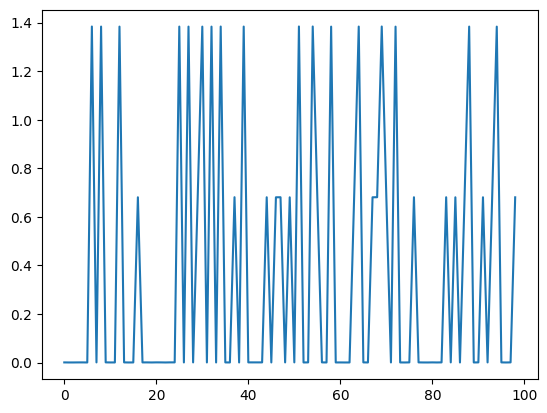

In [ ]:
import matplotlib.pyplot as plt

errores_v = entrenar_red(500,datos_ej1,pesos_ej1,0.1,red_size,0.5)

print('pesos actualizados',pesos_ej1)
plt.plot(errores_v[len(errores_v)-1])
plt.show()

In [ ]:
# cargamos los datos de prueba
import numpy as np
datos_prueba = np.genfromtxt("XOR_tst.csv", delimiter="," , skip_header=1)
datos_prueba = datos_prueba[0:9]
datos_pruebas = []
for i in np.arange(0,len(datos_prueba)):
  datos_pruebas.append( np.insert(datos_prueba[i],0,-1) )
print(datos_ej1)

In [ ]:
# prueba
def prueba_red(datos_pruebas,pesos,red_size):
  contador_error = 0; errores_epoca = []; salidas_red = [];
  for i in np.arange(0,len(datos_pruebas)):
    patron_i = datos_pruebas[i]
    entradas = np.array(patron_i[0:len(patron_i)-1])
    yd = [patron_i[len(patron_i)-1]]
    y = propagacion_adelante(entradas,pesos,red_size,0.5)
    salidas_red.append(y[len(y)-1])
    error = calculo_error(yd,y[len(y)-1])
    if( error != 0):
      contador_error+=1
      errores_epoca.append(error)
  errores_v.append(errores_epoca)
  print(errores_v)
  for n in np.arange(0,len(datos_pruebas)):
    print('salida deseada: ',datos_pruebas[n][len(datos_pruebas[n])-1], ' salida red: ',salidas_red[n])
  return salidas_red

In [ ]:
salidas = prueba_red(datos_pruebas,pesos_ej1,red_size)

[[1.0336976867819017, 0.9801141900732465, 0.9797973397785835, 1.0337175360960786, 1.0335431512942448, 0.9799954550040448, 1.0155908622167897, 1.0335859161913472, 1.0153902883613062, 1.033216915219126, 0.9798809342670404, 0.9798024820703729, 1.015493959426353, 1.0334927713794348, 0.9799884870225091, 0.9797153242464058, 0.9718218468562886, 1.033693437052885, 1.033446602278307, 0.9800791070666981, 1.0333347133265396, 1.0336035048416634, 0.9799915593948562, 1.0333674637840324, 1.033341638322576, 1.0155179733401885, 0.9798488304563803, 1.0156268333825016, 1.0336577755221408, 0.9715154977882773, 1.015871229388142, 0.9797907255650833, 1.0157870131594746, 0.9799697944303117, 1.0158617906095273, 1.033794678881581, 0.9798216332186049, 0.9714515859826993, 0.9801378639048097, 1.0156658062324704, 1.0334103242850081, 1.0334527667608804, 1.033418113680838, 1.0334355760523202, 0.9715685320640658, 0.9797052071048465, 0.9714982352207112, 0.9716156618339461, 1.0337436634858796, 0.9718121410939572, 1.0334

## Ejercicio 2
Utilice para entrenamiento y prueba los conjuntos de datos concenttrn.csv y concent tst.csv, que consisten en dos clases distribuidas en forma concentrica como muestra la Figura 1. Determine la estructura de una red de tipo perceptron multicapa que resulte mas apropiada para resolver este
problema. Represente graficamente, con diferentes colores, el resultado de la clasificacion realizada por el perceptron multicapa.


In [ ]:
# cargamos los datos de entrenamiento
import numpy as np
datos_entrenamiento2 = np.genfromtxt("concent_trn.csv", delimiter="," , skip_header=1)
datos_entrenamiento2 = datos_entrenamiento2[0:99]
datos_ej2 = []
for i in np.arange(0,len(datos_entrenamiento2)):
 datos_ej2.append( np.insert(datos_entrenamiento2[i],0,-1) )
#datos = np.insert(datos_entrenamiento,0,-1,axis=1)
print(datos_ej2)

[array([-1.        ,  0.64509132,  0.83106262,  1.        ]), array([-1.        ,  0.35075317,  0.14122327,  1.        ]), array([-1.        ,  0.30528354,  0.77442304,  1.        ]), array([-1.        ,  0.86238723,  0.33126522,  1.        ]), array([-1.        ,  0.0339309 ,  0.66083573,  1.        ]), array([-1.        ,  0.78465603,  0.71216752,  1.        ]), array([-1.        ,  0.63544211,  0.88904904,  1.        ]), array([-1.        ,  0.6787576 ,  0.93680237,  1.        ]), array([-1.        ,  0.09708674,  0.49261626,  1.        ]), array([-1.        ,  0.75376623,  0.842585  ,  1.        ]), array([-1.        ,  0.16331736,  0.3118514 ,  1.        ]), array([-1.        ,  0.32821082,  0.10582076,  1.        ]), array([-1.        ,  0.67215015,  0.78097717,  1.        ]), array([-1.        ,  0.08901383,  0.61390164,  1.        ]), array([-1.        ,  0.32906784,  0.06681603,  1.        ]), array([-1.        ,  0.70204508,  0.05713269,  1.        ]), array([-1.        ,  0.

In [ ]:
# definimos el tamaño de la red y la cantidad de neuronas en cada capa
red_size_ej2 = [2,1]

In [ ]:
# defino la matriz de pesos
pesos_ej2 = []
pesos_ej2.append(np.random.rand(red_size_ej2[0],len(datos_entrenamiento2[0]-1))-0.5)
for i in np.arange(1,len(red_size_ej2)):
  pesos_ej2.append(np.random.rand(red_size_ej2[i],red_size_ej2[i-1]+1)-0.5)
print(pesos_ej2)

[array([[ 0.06862524,  0.08328411,  0.18673814],
       [ 0.2463385 ,  0.27145813, -0.44171024]]), array([[ 0.18518487, -0.41716504, -0.27826405]])]


In [ ]:
# entreno la red
errores_v_ej2 = entrenar_red(epocas_max=500,datos=datos_ej2,pesos=pesos_ej2,eta=0.1,red_size=red_size_ej2,a=0.5)

In [ ]:
# cargamos los datos de prueba
datos_prueba_ej2 = np.genfromtxt("concent_tst.csv", delimiter="," , skip_header=1)
datos_prueba_ej2 = datos_prueba_ej2[0:9]
datos_pruebas_ej2 = []
for i in np.arange(0,len(datos_prueba_ej2)):
  datos_pruebas_ej2.append( np.insert(datos_prueba_ej2[i],0,-1) )
print(datos_pruebas_ej2)

[array([-1.        ,  0.85840725,  0.37605679,  1.        ]), array([-1.        ,  0.09411867,  0.41479737,  1.        ]), array([-1.        ,  0.6712616 ,  0.11529791,  1.        ]), array([-1.        ,  0.88312608,  0.67877824,  1.        ]), array([-1.        ,  0.54083539,  0.32142519, -1.        ]), array([-1.        ,  0.71578186,  0.36545695, -1.        ]), array([-1.        ,  0.64655732,  0.33037787, -1.        ]), array([-1.        ,  0.61761461,  0.03191955,  1.        ]), array([-1.        ,  0.48584155,  0.20003147,  1.        ])]


In [ ]:
# prueba de la red
salidas_ej2 = prueba_red(datos_pruebas_ej2,pesos_ej2,red_size_ej2)

[[1.0336976867819017, 0.9801141900732465, 0.9797973397785835, 1.0337175360960786, 1.0335431512942448, 0.9799954550040448, 1.0155908622167897, 1.0335859161913472, 1.0153902883613062, 1.033216915219126, 0.9798809342670404, 0.9798024820703729, 1.015493959426353, 1.0334927713794348, 0.9799884870225091, 0.9797153242464058, 0.9718218468562886, 1.033693437052885, 1.033446602278307, 0.9800791070666981, 1.0333347133265396, 1.0336035048416634, 0.9799915593948562, 1.0333674637840324, 1.033341638322576, 1.0155179733401885, 0.9798488304563803, 1.0156268333825016, 1.0336577755221408, 0.9715154977882773, 1.015871229388142, 0.9797907255650833, 1.0157870131594746, 0.9799697944303117, 1.0158617906095273, 1.033794678881581, 0.9798216332186049, 0.9714515859826993, 0.9801378639048097, 1.0156658062324704, 1.0334103242850081, 1.0334527667608804, 1.033418113680838, 1.0334355760523202, 0.9715685320640658, 0.9797052071048465, 0.9714982352207112, 0.9716156618339461, 1.0337436634858796, 0.9718121410939572, 1.0334

In [ ]:
# dibujamos los resultados